In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [60]:
base = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Machine Learning e Data Science com Python de A a Z/Secao3/credit_data.csv')
base.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [62]:
base.columns

Index(['i#clientid', 'income', 'age', 'loan', 'c#default'], dtype='object')

# Dicionário de dados
 
1 - i#clientid: id do cliente (Variável numérica discreta);
 
2 - income: renda do cliente (Variável numérica contínua);
 
3 - age: idade do cliente (Variável numérica discreta);
 
4 - loan: empréstimo pedido pelo cliente (Variável numérica contínua);
 
5 - c#default: variável booleana para aceitar ou não o empréstimo (Variável booleana);


# Comportamento da variável

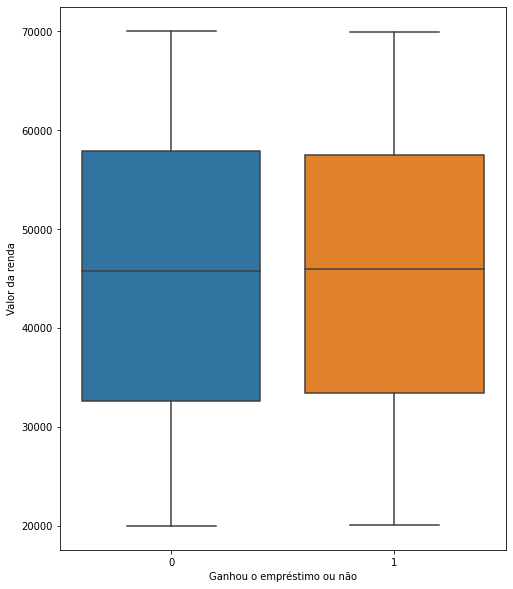

In [106]:
plt.figure(figsize=(8, 10))
sns.boxplot(y = "income", x = 'c#default', data=base)
plt.xlabel('Ganhou o empréstimo ou não')
plt.ylabel('Valor da renda')
plt.show()

- Os valores da renda dos clientes estão bem distribuídos tanto para aqueles que foram aceitos quanto aqueles que não ganharam o empréstimo. Isso nos mostra que difere o valor da renda para ganhar o empréstimo.

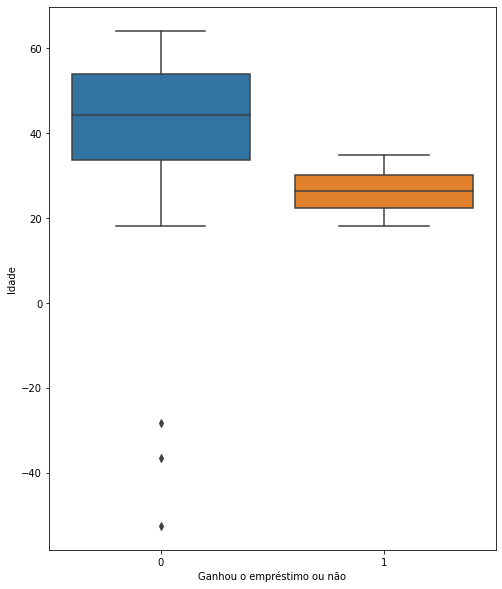

In [107]:
plt.figure(figsize=(8, 10))
sns.boxplot(y = "age", x='c#default' ,  data=base)
plt.xlabel('Ganhou o empréstimo ou não')
plt.ylabel('Idade')
plt.show()

- Notamos que possui dados que nao estao corretos que podem atrapalhar as análises e modelagens futuras. Mas podemos notar que a faixa de idade com empréstimo aceitos está entre 22 a 35 anos aproximadamente, sendo já um foco excelente para a aprovação do empréstimo.

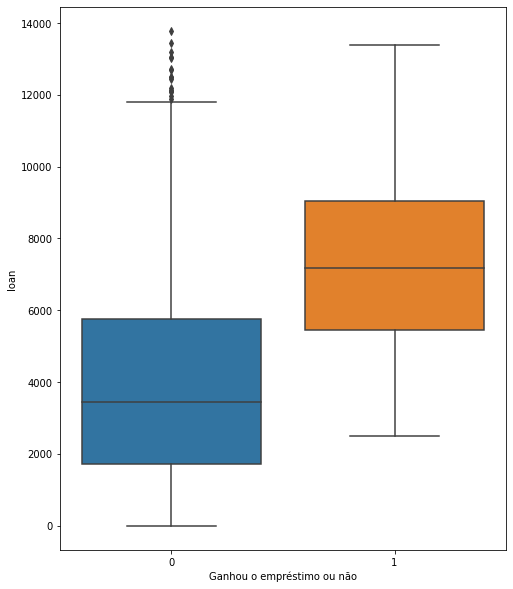

In [108]:
plt.figure(figsize=(8, 10))
sns.boxplot(y = "loan", x = 'c#default', data=base)
plt.xlabel('Ganhou o empréstimo ou não')
plt.show()

- Temos que os empréstimos aceitos têm valores maiores em relação aos empréstimos não aceitos. Isso pode ser explicado por causa do retorno mais lucrativo para a financiadora quando o valor emprestado for maior.

#Pré-Processamento de dados

In [97]:
base.describe()

,i#clientid,income,age,loan,c#default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [98]:
base[base['age'] > 0].describe()

,i#clientid,income,age,loan,c#default
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,1003.431795,45328.856915,40.927700,4443.240892,0.141926
std,575.879624,14326.777212,13.271802,3046.879619,0.349062
min,1.000000,20014.489470,18.055189,1.377630,0.000000
25%,505.250000,32812.340050,29.043284,1934.218490,0.000000
50%,1003.500000,45785.950926,41.382673,3971.653442,0.000000
75%,1501.750000,57782.054534,52.616900,6438.044498,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


- Fazendo uma breve olhada para as descrições mostradas, já podemos notar que na na idade (age) possui uma idade bem discrepante (-52) gerando uma inconsistência dos dados.

In [94]:
base.loc[base['age'] < 0]

,i#clientid,income,age,loan,c#default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


- Encontrando os clientes da base que estão com a idade inconsistente e fazendo o tratamento com os registros problemáticos.

In [6]:
base.mean()

i#clientid     1000.500000
income        45331.600018
age              40.807559
loan           4444.369695
c#default         0.141500
dtype: float64

In [7]:
base['age'][base.age > 0].mean()

40.92770044906149

- Encontrando a média das idades desconsiderando os valores negativo como foi mostrado mais acima.

In [8]:
base.loc[base.age < 0, 'age'] = 40.927700
base.loc[base['age'] < 0]

,i#clientid,income,age,loan,c#default


- Agora não há mais valores inconsistentes para a idade.

In [9]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   i#clientid  2000 non-null   int64  
 1   income      2000 non-null   float64
 2   age         1997 non-null   float64
 3   loan        2000 non-null   float64
 4   c#default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


- Analisando as informações das variáveis, podemos notar que para a idade (age) existem valores nulos (3 valores).

In [46]:
base.loc[pd.isnull(base['age'])]

,i#clientid,income,age,loan,c#default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


- Para fazer a correção dos dados faltantes, uma solução é a utilização do sklearn.impute com o SimpleImputer.

In [53]:
previsores = base.iloc[:, 1:4].values
classe = base.iloc[:, 4].values

- Fazendo a divisão da base para prever os valores.

In [54]:
from sklearn.impute import SimpleImputer

In [57]:
imputer = SimpleImputer(strategy = 'mean')
imputer = imputer.fit(previsores[:, 0:3])
previsores[:, 0:3] = imputer.transform(previsores[:, 0:3])
previsores[28:31]

array([[5.94178054e+04, 4.09277004e+01, 2.08262594e+03],
       [5.88428913e+04, 5.45109476e+01, 1.08711868e+04],
       [4.85288528e+04, 4.09277004e+01, 6.15578467e+03]])

- O resultado da utilização do SimpleImputer para consertar os dados faltantes na base.

## Escalonando os dados
Como os dados da renda em relação aos dados da idade são bem discrepantes, possivelmente, o modelo daria uma preferência maior para os valores que estão na renda do que em nos valores da idade.
 
Assim é necessário fazer o ajuste de escala para entre esses valores para que a predição aconteça com maior certeza em relação a algoritmos baseados em distância euclidiana (KNN).


Assim é possível utilizar dois métodos para fazer o escalonamento que são o da Padronização (Standardisation) e o Normalização (Normalization)
 
Padronização
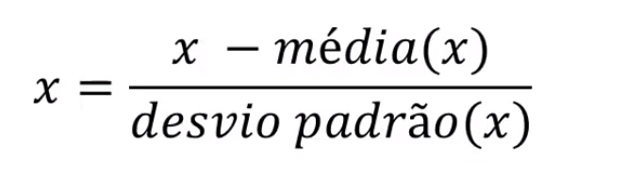





Normalização
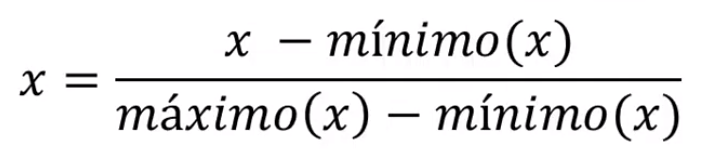

Assim, utilizando o sklearn para fazer os cálculos dos escalonamentos temos:

In [35]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)
previsores

array([[ 1.45393393,  1.36538005,  1.20281942],
       [-0.76217555,  0.54265932,  0.69642695],
       [ 0.83682073,  1.67417101,  1.17471147],
       ...,
       [-0.07122592, -0.97448606,  0.35420081],
       [-0.11000289,  1.73936652, -0.92675625],
       [ 1.682986  ,  1.14917551,  0.96381038]])

- Agora com esse ajuste da escala, não existe a diferença relevante entre a renda e a idade.